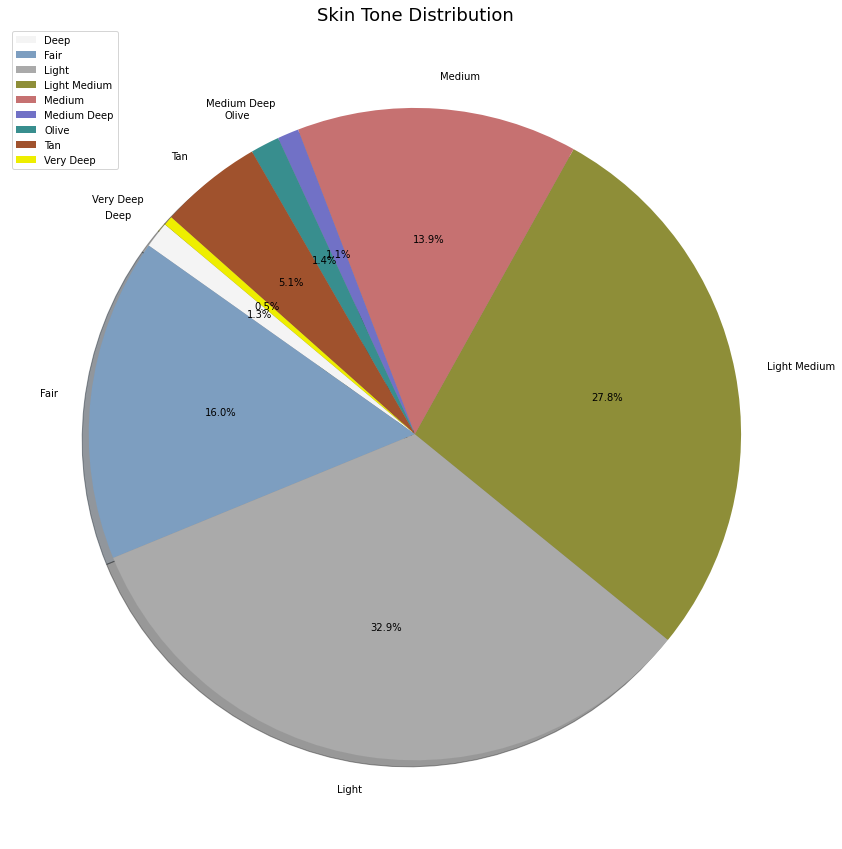

In [1]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import word_tokenize
from nltk.util import ngrams
import nltk.corpus
from nltk.probability import FreqDist
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt    
import csv
import os
import re


# Read data
df=pd.read_csv(os.path.join('Data','Skin_wreviews_cleaned.csv'))


# Pie chart for skin tone 
colors=['#F4F4F4','#7D9EC0','#AAAAAA','#8E8E38','#C67171', '#7171C6','#388E8E','#A0522D','#EEEE00']
skintone_pie=df.groupby(['Skin_Tone']).size().plot.pie(colors=colors,autopct='%1.1f%%', shadow=True, startangle=140,figsize=(15,15))
plt.title("Skin Tone Distribution",fontsize=18)
plt.ylabel(None)
plt.legend()
plt.show() 


# 90.6 % of customer has Fair/Light/Light Medium/Medium skin tone. 
# People with fairer skin tone whose skin contains less melanin, are at greater risk for sun damage, so it seems like they purchase more sunscre

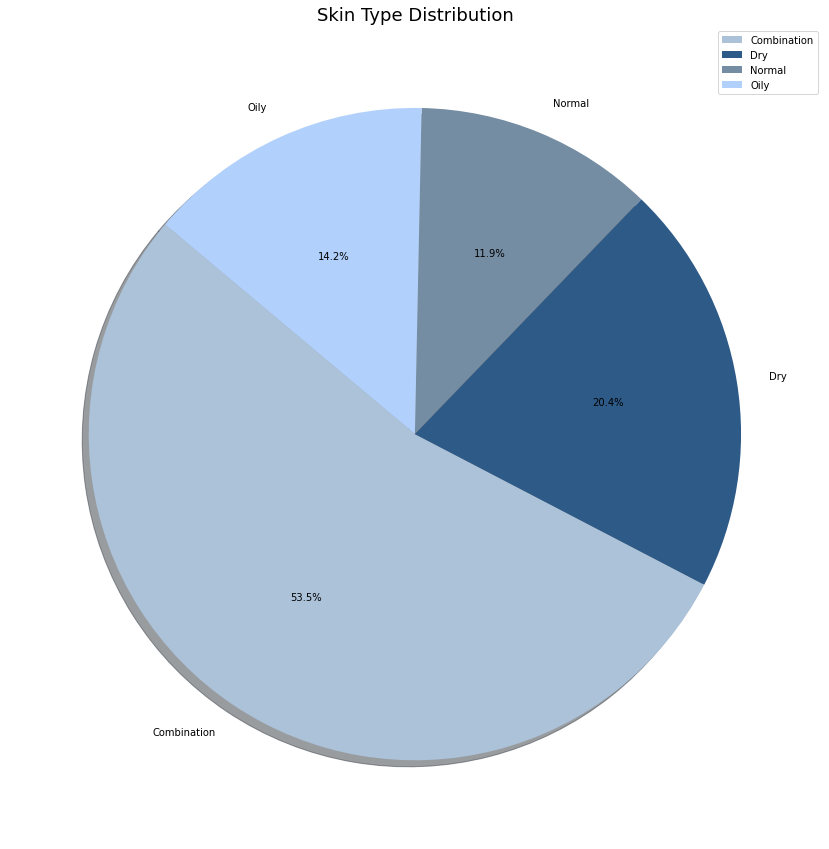

In [2]:

# Pie chart for skin type
colors=['#acc2d9','#2e5a88','#758da3','#b1d1fc']
skintone_pie=df.groupby(['Skin_Type']).size().plot.pie(colors=colors,autopct='%1.1f%%', shadow=True, startangle=140,figsize=(15,15))
plt.title("Skin Type Distribution",fontsize=18)
plt.ylabel(None)
plt.legend()
plt.show() 


# Over 50% of customer has Combination skin type. Next largest is Dry, and Oily.



In [3]:
# Categorize skin tone into two types - Brighter(Fair,Light, Light Medium, Medium) and Deeper(Olive, Medium Deep, Tan, Very Deep) and analyze comments according to each type to determine the value of the consumer
# Using NLTK to find word frequency, also removing stop words


import nltk
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize


fd1 = FreqDist()

Group1_df= df[df['Skin_Tone'].str.contains("Fair|Light|Light Medium|Medium")].iloc[:, 1:]
Group1_df=Group1_df.reset_index()[['Product_ID','Comment','Skin_Tone']]
Group1_comment = list(Group1_df['Comment'])

stop = stopwords.words('English')

for sentence1 in Group1_comment:
    for words1 in (nltk.word_tokenize(sentence1)):
        words = words1.split()
        words = [w for w in words if w not in stop]
        list1 = ' '.join(words)
        words = word_tokenize(list1)
        words = [re.sub('[^A-Za-z0-9]+', '', w) for w in words]
        words = [w for w in words if w]
        
        for w in words:
            fd1[w] += 1

fd1.most_common(10)


[('skin', 3189),
 ('sunscreen', 2520),
 ('white', 1309),
 ('like', 1212),
 ('cast', 1182),
 ('really', 912),
 ('one', 893),
 ('love', 803),
 ('good', 722),
 ('use', 687)]

In [4]:

fd2 = FreqDist()

Group2_df= df[df['Skin_Tone'].str.contains("Olive|Medium Deep|Deep|Tan|Very Deep")].iloc[:, 1:]
Group2_df=Group2_df.reset_index()[['Product_ID','Comment','Skin_Tone']]
Group2_comment = list(Group2_df['Comment'])

stopwords = nltk.corpus.stopwords.words("english")

for sentence2 in Group2_comment:
    for words2 in (nltk.word_tokenize(sentence2)):
        if words2 not in stopwords:
        	fd2[words2] += 1

fd2.most_common(10)


[('skin', 401),
 ('sunscreen', 308),
 ('white', 200),
 ('cast', 196),
 ('like', 158),
 ('one', 109),
 ('oily', 98),
 ('really', 94),
 ('leave', 90),
 ('love', 83)]

Text(0, 0.5, 'Frequency')

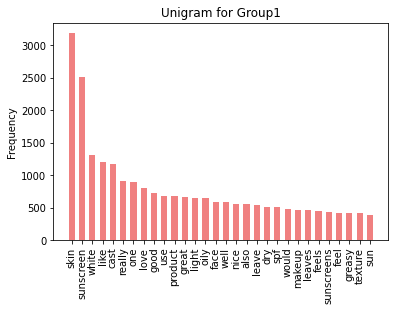

In [5]:
%matplotlib inline
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt

for tag, count in fd1.most_common(30):
        "{}: {}".format(tag, count) 

y = [count for tag, count in fd1.most_common(30)]
x = [tag for tag, count in fd1.most_common(30)]

plt.bar(x, y, color='lightcoral',width=0.6)
plt.xticks(rotation=90)
plt.title("Unigram for Group1")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

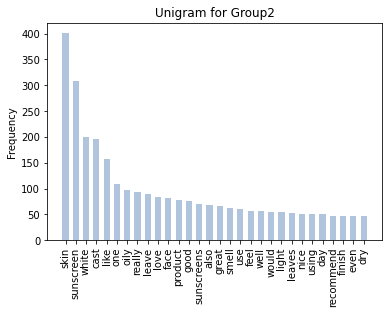

In [6]:

for tag, count in fd2.most_common(30):
        "{}: {}".format(tag, count)

y = [count for tag, count in fd2.most_common(30)]
x = [tag for tag, count in fd2.most_common(30)]

plt.bar(x, y, color='lightsteelblue', width=0.6)
plt.xticks(rotation=90)
plt.title("Unigram for Group2")
plt.ylabel("Frequency")

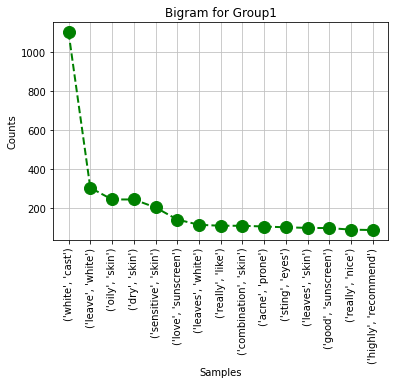

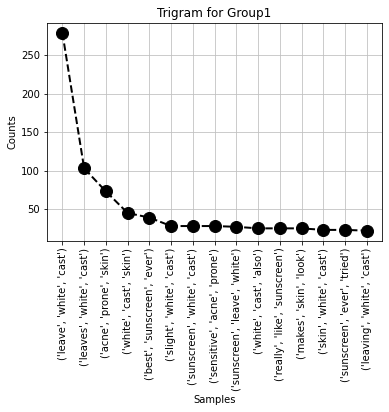

<AxesSubplot:title={'center':'Trigram for Group1'}, xlabel='Samples', ylabel='Counts'>

In [7]:
# Making bigram and trigram for group1

from nltk.corpus import stopwords

df=pd.read_csv(os.path.join("Data","Skin_wreviews_cleaned.csv"))

Group1_df= df[df['Skin_Tone'].str.contains("Fair|Light|Light Medium|Medium")].iloc[:, 1:]
Group1_df=Group1_df.reset_index()[['Product_ID','Comment','Skin_Tone']]
Group1_comment = list(Group1_df['Comment'])

stop = stopwords.words('English')

bilist1 = FreqDist()
trilist1 = FreqDist()
    
for sentence1 in Group1_comment:
        words1 = nltk.word_tokenize(sentence1)
        words1 = [w for w in words1 if w not in stop]
        list1 = ' '.join(words1)
        words1 = word_tokenize(list1)
        words1 = [re.sub('[^A-Za-z0-9]+', '', w) for w in words1]
        words1 = [w for w in words1 if w]
        
#         bilist_1=(pd.Series(nltk.nrams(words, 2)).value_counts())[:20]
#         trilist_1=(pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

        
        for word1 in list(nltk.bigrams(words1)): 
            bilist1[word1] += 1
            
        for word1 in list(nltk.trigrams(words1)): 
            trilist1[word1] += 1


bilist1.most_common(15)
bilist1.plot(15, title="Bigram for Group1",color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)



trilist1.most_common(15)
trilist1.plot(15, title="Trigram for Group1", color='black', marker='o', linestyle='dashed', linewidth=2, markersize=12)



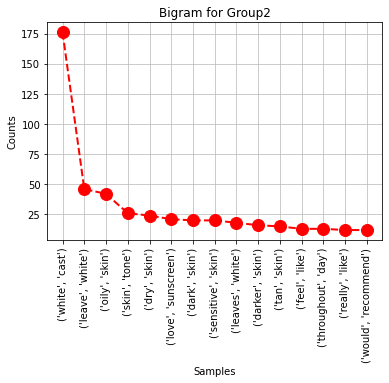

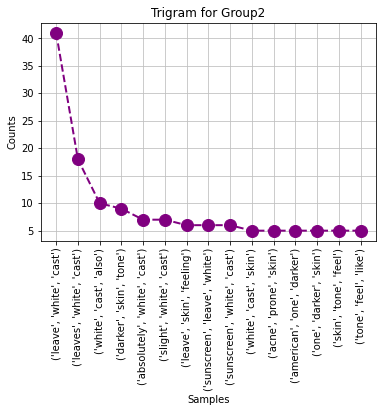

<AxesSubplot:title={'center':'Trigram for Group2'}, xlabel='Samples', ylabel='Counts'>

In [8]:
# Making bigram and trigram for group2


Group2_df= df[df['Skin_Tone'].str.contains("Olive|Medium Deep|Deep|Tan|Very Deep")].iloc[:, 1:]
Group2_df=Group2_df.reset_index()[['Product_ID','Comment','Skin_Tone']]
Group2_comment = list(Group2_df['Comment'])

stopwords = nltk.corpus.stopwords.words("english")


bilist2 = FreqDist()
trilist2 = FreqDist()


for sentence2 in Group2_comment:
        words = nltk.word_tokenize(sentence2)
        words = [w for w in words if w not in stop]
        list2 = ' '.join(words)
        words = word_tokenize(list2)
        words = [re.sub('[^A-Za-z0-9]+', '', w) for w in words]
        words = [w for w in words if w]
        
        for word in list(nltk.bigrams(words)): 
            bilist2[word] += 1
            
        for word in list(nltk.trigrams(words)): 
            trilist2[word] += 1

bilist2.most_common(15)
bilist2.plot(15, title="Bigram for Group2", color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)



trilist2.most_common(15)
trilist2.plot(15, title="Trigram for Group2", color='purple', marker='o', linestyle='dashed', linewidth=2, markersize=12)

        
        

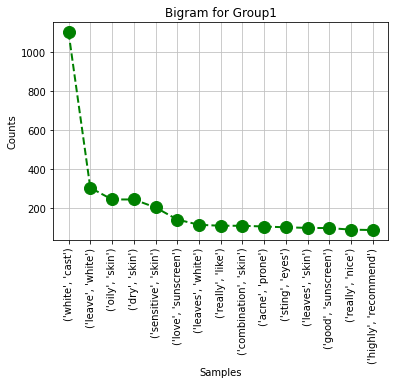

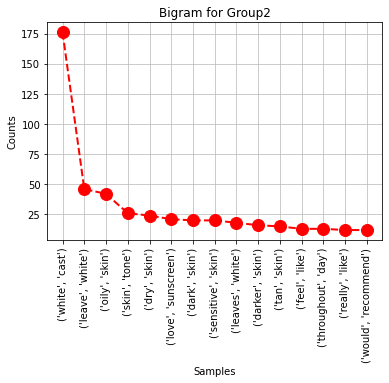

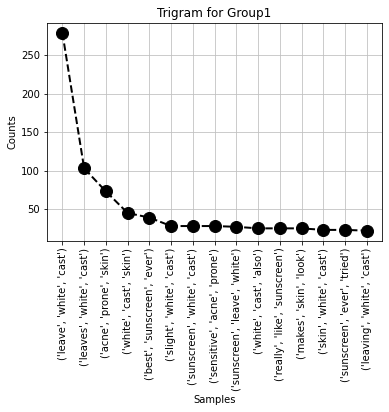

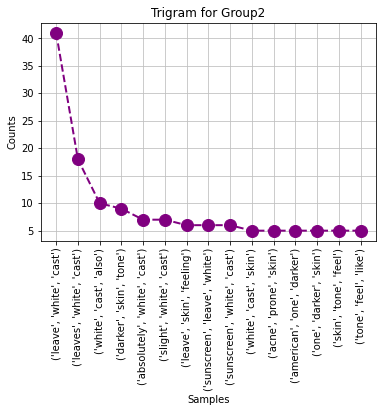

<AxesSubplot:title={'center':'Trigram for Group2'}, xlabel='Samples', ylabel='Counts'>

In [10]:
bilist1.most_common(15)
bilist1.plot(15, title="Bigram for Group1",color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)


bilist2.most_common(15)
bilist2.plot(15, title="Bigram for Group2", color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)


trilist1.most_common(15)
trilist1.plot(15, title="Trigram for Group1", color='black', marker='o', linestyle='dashed', linewidth=2, markersize=12)


trilist2.most_common(15)
trilist2.plot(15, title="Trigram for Group2", color='purple', marker='o', linestyle='dashed', linewidth=2, markersize=12)

        
